In [98]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.stattools import arma_order_select_ic

In [99]:
data = np.loadtxt('projectdata.txt')

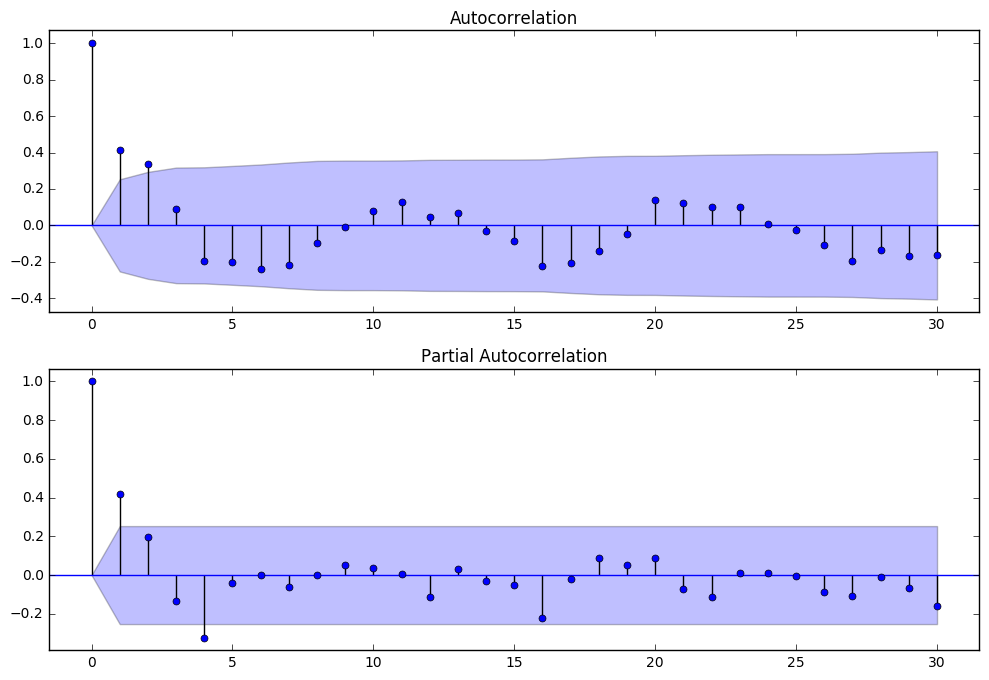

In [100]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data, lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data, lags=30, ax=ax2)
plt.show()

In [101]:
order = arma_order_select_ic(data)
print order

{'bic_min_order': (0, 2), 'bic':             0           1           2
0  226.473501  222.945027  216.186550
1  218.541745  221.196756  217.092009
2  219.339094  222.920643  220.672399
3  221.358969  221.094146  223.473685
4  217.622097  221.697061  225.791396}


In [102]:
arma_mod10 = sm.tsa.ARMA(data, (1,0))
arma_mod10_results = arma_mod10.fit()
print arma_mod10_results.summary()

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   60
Model:                     ARMA(1, 0)   Log Likelihood                -103.129
Method:                       css-mle   S.D. of innovations              1.347
Date:                Sat, 15 Apr 2017   AIC                            212.259
Time:                        16:45:28   BIC                            218.542
Sample:                             0   HQIC                           214.716
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.4101      0.304     -1.348      0.183        -1.006     0.186
ar.L1.y        0.4355      0.119      3.667      0.001         0.203     0.668
                                    Roots           

In [103]:
arma_mod02 = sm.tsa.ARMA(data, (0,2))
arma_mod02_results = arma_mod02.fit()
print arma_mod02_results.summary()

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   60
Model:                     ARMA(0, 2)   Log Likelihood                 -99.905
Method:                       css-mle   S.D. of innovations              1.272
Date:                Sat, 15 Apr 2017   AIC                            207.809
Time:                        16:45:29   BIC                            216.187
Sample:                             0   HQIC                           211.086
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.3795      0.282     -1.345      0.184        -0.932     0.173
ma.L1.y        0.2099      0.130      1.614      0.112        -0.045     0.465
ma.L2.y        0.5287      0.129      4.113      0.0

In [104]:
arma_mod20 = sm.tsa.ARMA(data, (2,0))
arma_mod20_results = arma_mod20.fit()
print arma_mod20_results.summary()

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   60
Model:                     ARMA(2, 0)   Log Likelihood                -101.481
Method:                       css-mle   S.D. of innovations              1.309
Date:                Sat, 15 Apr 2017   AIC                            210.962
Time:                        16:45:30   BIC                            219.339
Sample:                             0   HQIC                           214.239
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.3767      0.396     -0.952      0.345        -1.152     0.399
ar.L1.y        0.3385      0.126      2.684      0.010         0.091     0.586
ar.L2.y        0.2470      0.134      1.847      0.0

In [105]:
arma_mod10_resid = arma_mod10_results.resid
print stats.normaltest(arma_mod10_resid)

NormaltestResult(statistic=2.7432329045627739, pvalue=0.25369653957983185)


In [106]:
arma_mod02_resid = arma_mod02_results.resid
print stats.normaltest(arma_mod02_resid)

NormaltestResult(statistic=0.13752196310119122, pvalue=0.93354978903657848)


In [107]:
arma_mod20_resid = arma_mod20_results.resid
print stats.normaltest(arma_mod20_resid)

NormaltestResult(statistic=1.2190855330335877, pvalue=0.54359936409076159)


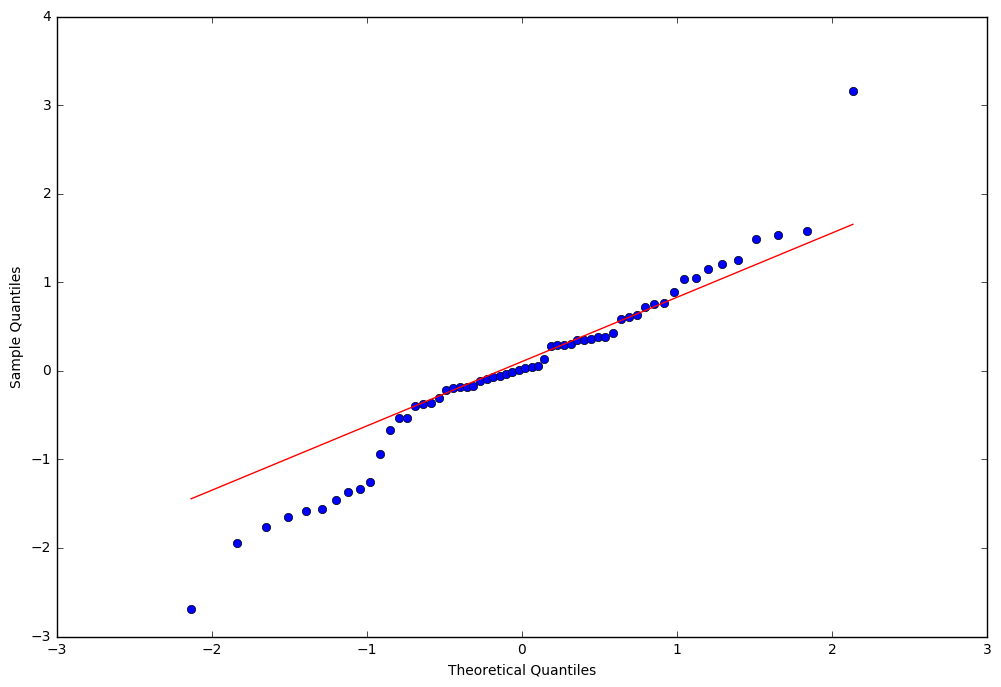

In [108]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(arma_mod10_resid, line='q', ax=ax, fit=True)
plt.show()

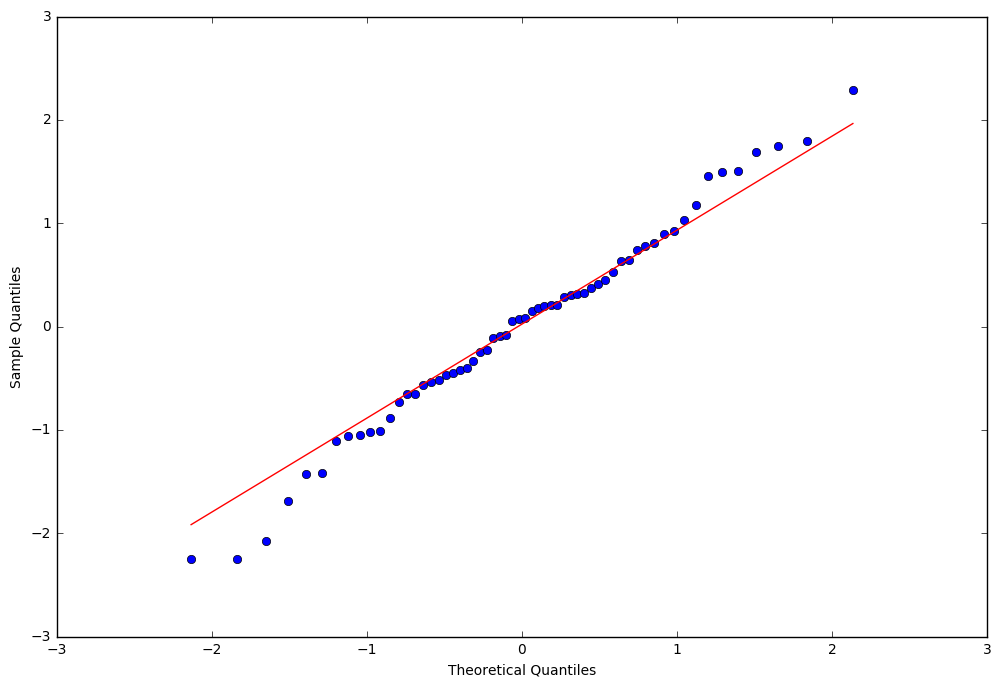

In [109]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(arma_mod02_resid, line='q', ax=ax, fit=True)
plt.show()

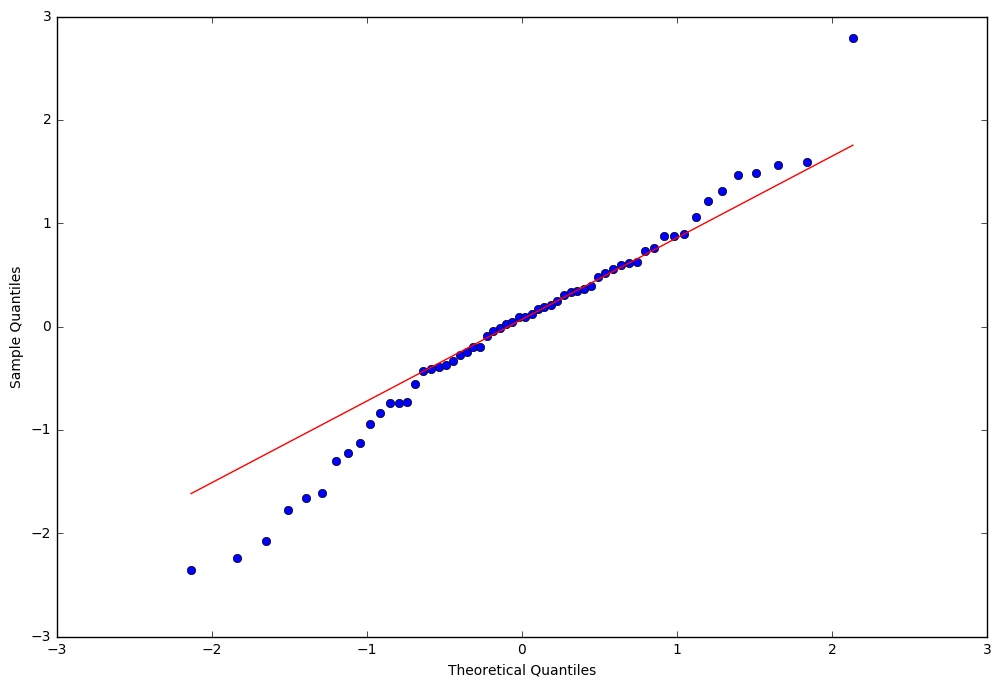

In [110]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(arma_mod20_resid, line='q', ax=ax, fit=True)
plt.show()

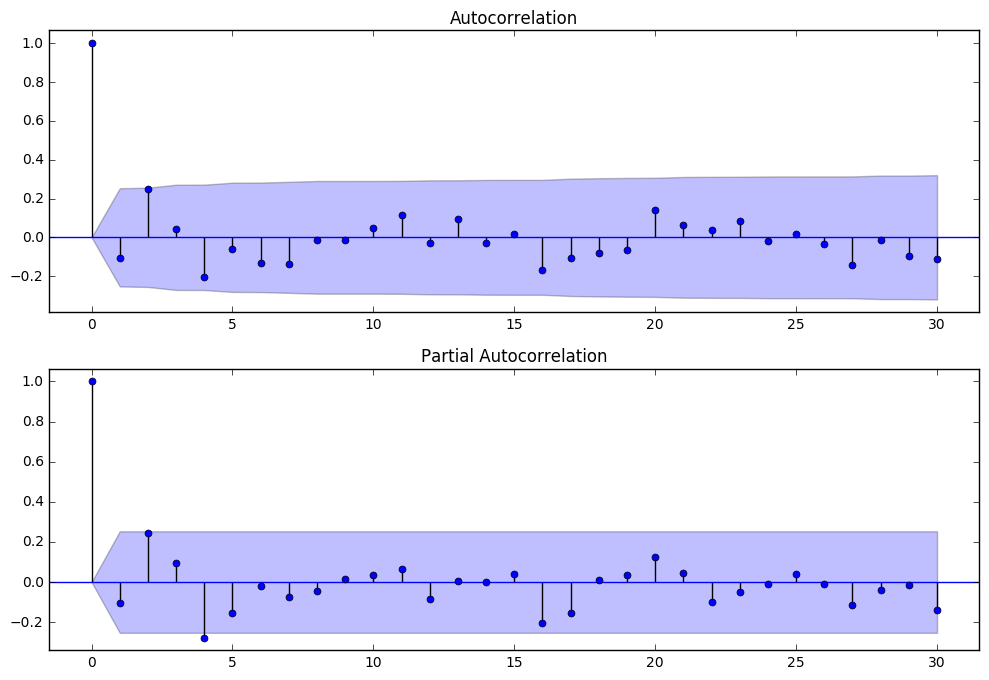

In [111]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arma_mod10_resid, lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arma_mod10_resid, lags=30, ax=ax2)
plt.show()

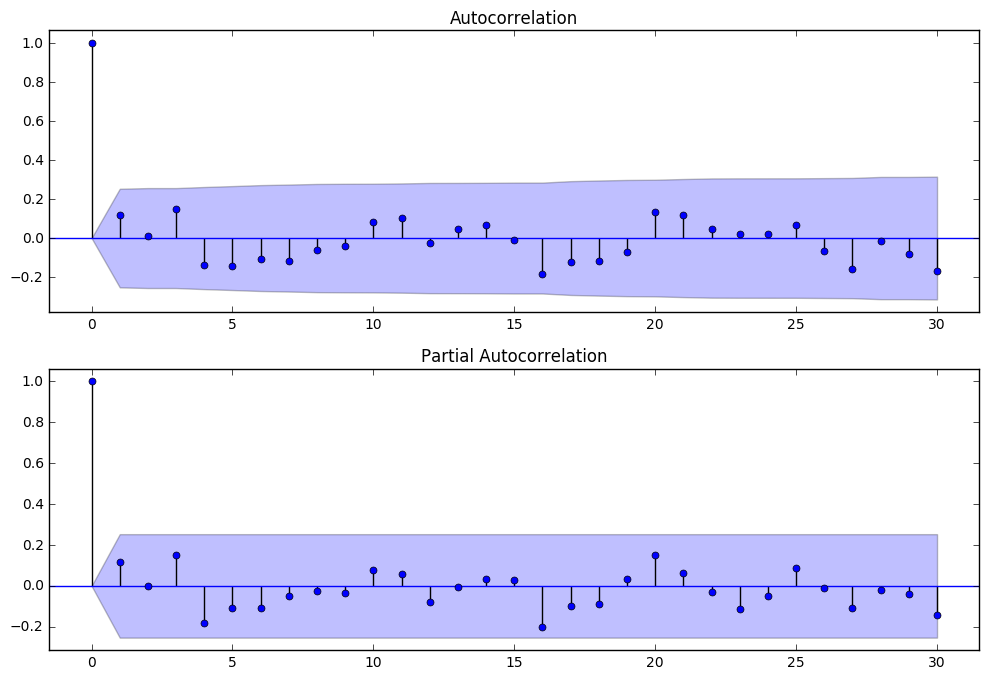

In [112]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arma_mod02_resid, lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arma_mod02_resid, lags=30, ax=ax2)
plt.show()

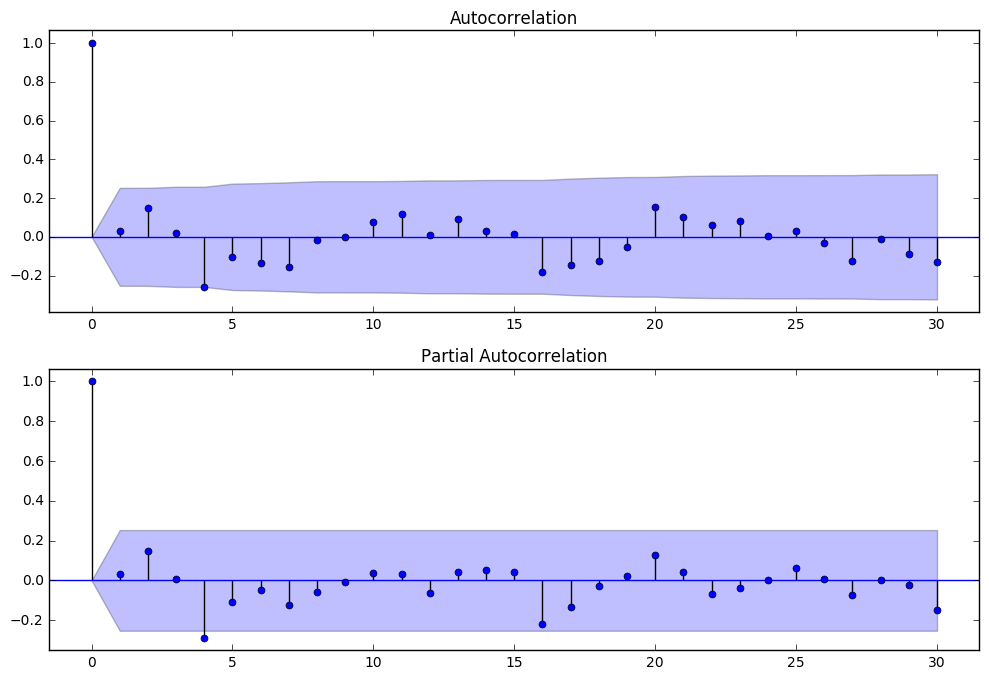

In [113]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arma_mod20_resid, lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arma_mod20_resid, lags=30, ax=ax2)
plt.show()

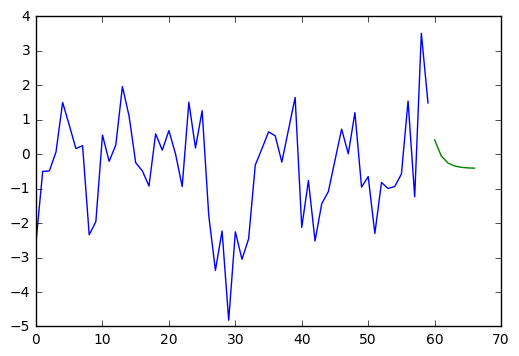

In [114]:
predict = arma_mod10_results.predict(start = 60, end= 66, dynamic= True)
plt.plot(data)
plt.plot(np.arange(60,67), predict)
plt.show()

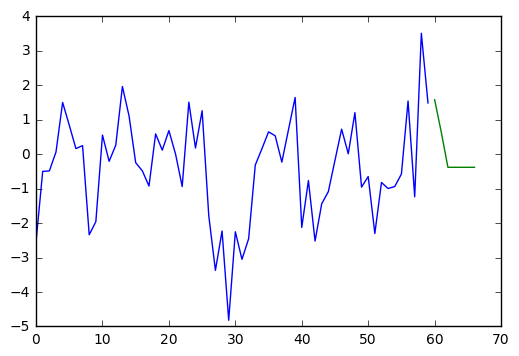

In [115]:
predict = arma_mod02_results.predict(start = 60, end= 66, dynamic= True)
plt.plot(data)
plt.plot(np.arange(60,67), predict)
plt.show()

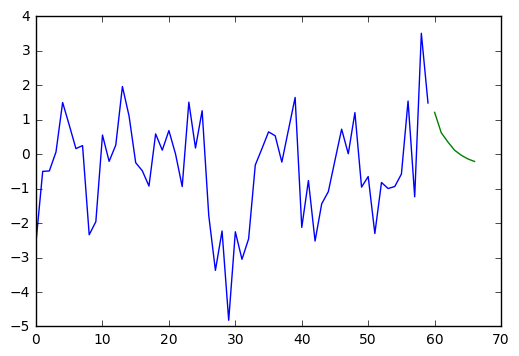

In [116]:
predict = arma_mod20_results.predict(start = 60, end= 66, dynamic= True)
plt.plot(data)
plt.plot(np.arange(60,67), predict)
plt.show()